In [59]:
import pandas as pd
import numpy as np 
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from pythainlp.tokenize import word_tokenize
import emoji
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf

In [60]:
df = pd.read_csv('sentiment_analysis.csv')
df = df.drop(df.columns[0], axis=1)

In [61]:
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def ungroup_emoji(toks):
    res = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            for char in tok:
                res.append(char)
        else:
            res.append(tok)
    return res

def process_text(text):
    res = text.lower().strip() 
    res = replace_url(res)
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    res = ungroup_emoji(res)
    return res

df['processed'] = df.comments.map(lambda x: '|'.join(process_text(x)))


แบ่ง Train,Test 80:20

In [62]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1412)
print('train data')
print(train_df.target.value_counts()/train_df.shape[0])
print('test data')
print(test_df.target.value_counts()/test_df.shape[0])

train data
pos    0.916667
neg    0.083333
Name: target, dtype: float64
test data
pos    0.905263
neg    0.094737
Name: target, dtype: float64


In [63]:
(train_df.shape,test_df.shape)

((756, 3), (190, 3))

In [64]:
def process_text_rnn(text):
    res = text.lower().strip()
    res = replace_url(res)
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    res = ungroup_emoji(res)
    
    return ' '.join(res)

In [65]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

text_train = [' '.join(x.split('|')) for x in train_df['processed'].values.tolist()]
text_test = [' '.join(x.split('|')) for x in test_df['processed'].values.tolist()]

In [66]:
word_count = []
for sent in text_train:
  for w in sent.split():
      word_count.append(w)

In [67]:
VOCAB_SIZE = len(set(word_count))
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(text_train)

2022-10-20 12:05:25.557395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [68]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'ที่', 'ได้', 'มี', 'และ', 'ครับ', 'ให้', 'ใน', 'ไม่',
       'การ', 'มาก', 'เป็น', 'สอน', 'คอร์ส', 'ไป', 'ดี', 'ค่ะ', 'ๆ',
       'เข้าใจง่าย'], dtype='<U34')

In [69]:
example = process_text_rnn('สอนได้ดีมาก')
encoded_example = encoder(example).numpy()
print(encoded_example)

[13  3 20]


In [70]:
[vocab[x] for x in encoded_example]


['สอน', 'ได้', 'ดีมาก']

In [71]:
y_train = train_df['target']
y_test = test_df['target']
y_class = ['neg', 'pos']

In [72]:
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(y_class)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


แปลงจากDictionary lookup-->vecter(ทำword embedding)-->LSTMสร้างfeature-->ใช้fully connected layerในการทำนายคำตอบสุดท้าย

In [73]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=512,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

In [74]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [75]:
model.fit(np.array(text_train), y_train, validation_data=(np.array(text_test), y_test), epochs=3, verbose=2)


Epoch 1/3


2022-10-20 12:05:28.756657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-20 12:05:29.218475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-20 12:05:29.369196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-20 12:05:29.678339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-20 12:05:29.832426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-20 12:05:40.386356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-20 12:05:40.603224: I tensorflow/core/grappler/optimizers/cust

24/24 - 16s - loss: 0.4477 - accuracy: 0.9101 - val_loss: 0.3189 - val_accuracy: 0.9053 - 16s/epoch - 660ms/step
Epoch 2/3
24/24 - 5s - loss: 0.2937 - accuracy: 0.9167 - val_loss: 0.3186 - val_accuracy: 0.9053 - 5s/epoch - 216ms/step
Epoch 3/3
24/24 - 4s - loss: 0.2914 - accuracy: 0.9167 - val_loss: 0.3151 - val_accuracy: 0.9053 - 4s/epoch - 162ms/step


In [76]:
value = model.predict(np.array(text_test))
y_test_pred = np.argmax(value,axis=1)
y_test_true = np.argmax(y_test,axis=1)
print(classification_report(y_test_true, y_test_pred))

2022-10-20 12:05:52.016302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-20 12:05:52.219677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-20 12:05:52.280337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 2s 199ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.91      1.00      0.95       172

    accuracy                           0.91       190
   macro avg       0.45      0.50      0.48       190
weighted avg       0.82      0.91      0.86       190



/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

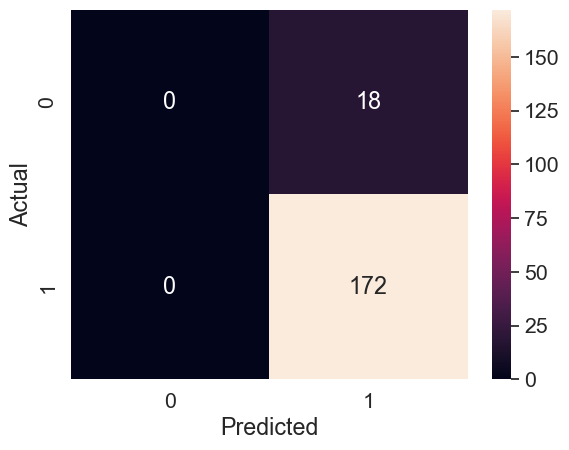

In [77]:
conf_mat = confusion_matrix(y_test_true,y_test_pred)
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()